Question 1 

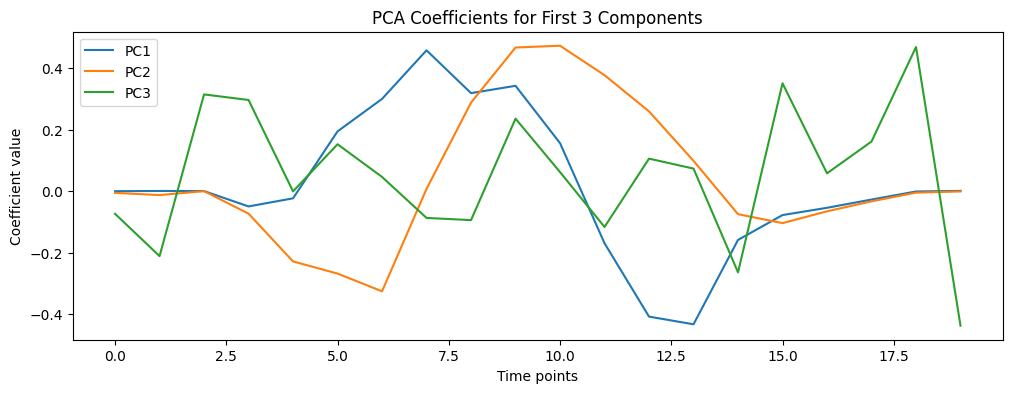

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load data
data = pd.read_csv('lfp_data.csv', header=None).values  # shape: (trials, time points)

# Perform PCA using sklearn
pca = PCA()
pca.fit(data)

# Plot coefficients for the first 3 components
plt.figure(figsize=(12, 4))
for i in range(3):
    plt.plot(pca.components_[i], label=f'PC{i+1}')
plt.legend()
plt.title('PCA Coefficients for First 3 Components')
plt.xlabel('Time points')
plt.ylabel('Coefficient value')
plt.show()


question 1 b 
1.Center the data (subtract the mean from each column).
2.Compute the covariance matrix.
3.Calculate the eigenvalues and eigenvectors of that matrix.
4.Sort them in order of biggest-to-smallest eigenvalue.
5.Take the eigenvectors — they are the principal components!

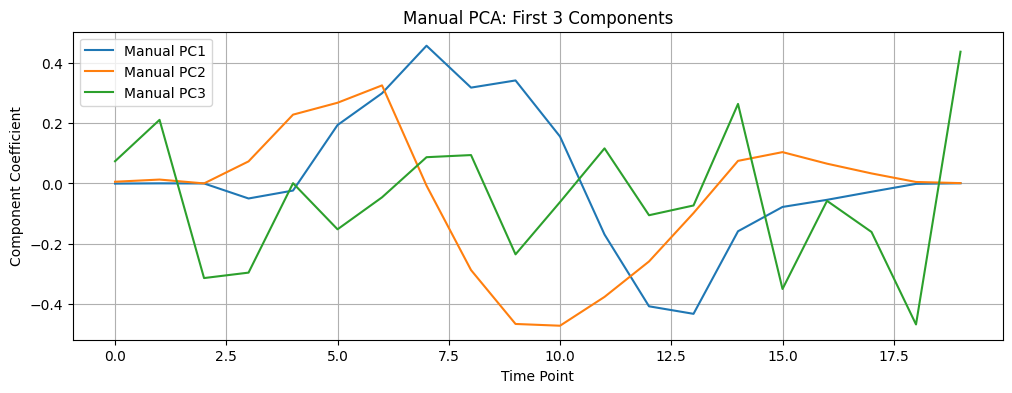

In [3]:
# Step 1: Center the data (subtract the mean of each column)
X_centered = data - np.mean(data, axis=0)  # same shape as data
# Step 2: Compute the covariance matrix (columns = variables/time points)
cov_matrix = np.cov(X_centered, rowvar=False)
# Step 3: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
# Step 4: Sort eigenvectors by descending eigenvalues
idx = np.argsort(eigenvalues)[::-1]  # sort from largest to smallest
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]
# Plot the first 3 eigenvectors (principal components)
plt.figure(figsize=(12, 4))
for i in range(3):
    plt.plot(eigenvectors[:, i], label=f'Manual PC{i+1}')
plt.title('Manual PCA: First 3 Components')
plt.xlabel('Time Point')
plt.ylabel('Component Coefficient')
plt.legend()
plt.grid(True)
plt.show()


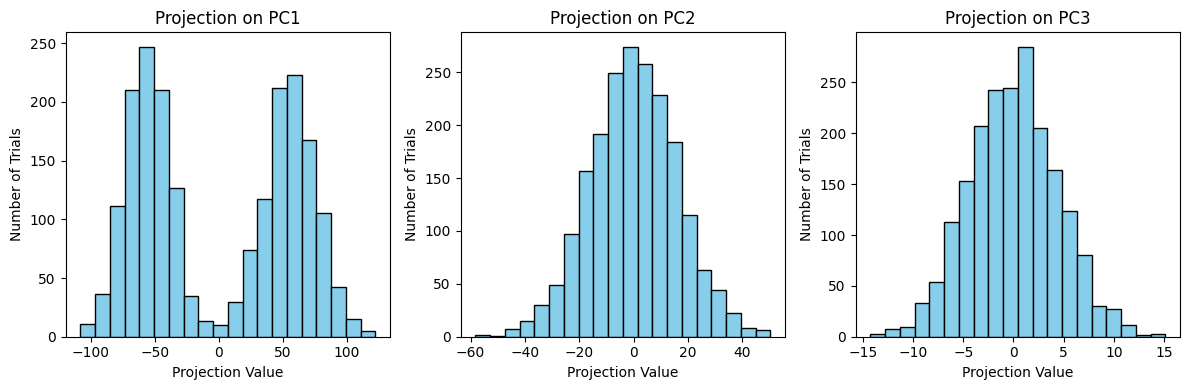

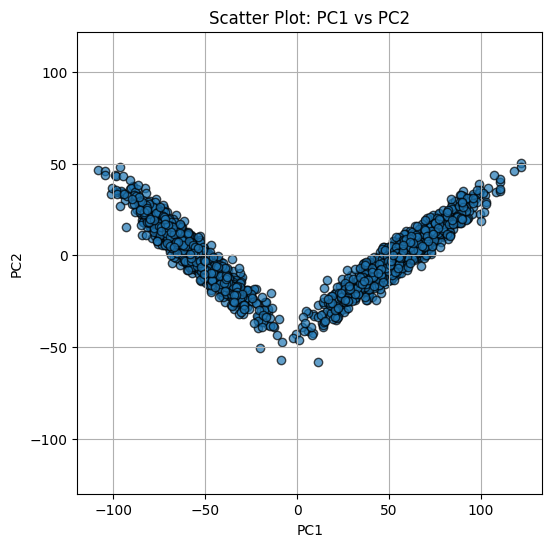

In [4]:
#c
# Take first 3 eigenvectors (each column is a PC)
W = eigenvectors[:, :3]  # shape: (time_points, 3)

# Project the centered data
projections = np.dot(X_centered, W)  # shape: (trials, 3)

# Histograms for projections on PC1, PC2, PC3
plt.figure(figsize=(12, 4))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.hist(projections[:, i], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Projection on PC{i+1}')
    plt.xlabel('Projection Value')
    plt.ylabel('Number of Trials')

plt.tight_layout()
plt.show()
plt.figure(figsize=(6, 6))
plt.scatter(projections[:, 0], projections[:, 1], alpha=0.7, edgecolor='k')
plt.title('Scatter Plot: PC1 vs PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.axis('equal')
plt.show()


The histograms show how each trial projects onto the first three principal components. The first component (PC1) displays a bimodal distribution, indicating that the data likely contains two distinct trial types or brain states. This makes PC1 highly informative for classification.
PC2 and PC3 both show unimodal, bell-shaped distributions, suggesting they capture within-class variability or noise, rather than differences between classes.

The scatter plot of PC1 vs. PC2 reveals a clear V-shaped separation, where trials form two distinct clusters along PC1. This confirms that PC1 effectively separates the data, and the combination of PC1 and PC2 gives a meaningful low-dimensional representation of the original high-dimensional LFP signals.

In [5]:
total_variance = np.sum(eigenvalues)
var_pc1 = eigenvalues[0] / total_variance * 100
var_pc2 = eigenvalues[1] / total_variance * 100
combined = var_pc1 + var_pc2
unexplained = 100 - combined

print(f"PC1 explains: {var_pc1:.2f}%")
print(f"PC2 explains: {var_pc2:.2f}%")
print(f"Combined (PC1 + PC2): {combined:.2f}%")
print(f"Unexplained variance: {unexplained:.2f}%")


PC1 explains: 86.53%
PC2 explains: 6.33%
Combined (PC1 + PC2): 92.86%
Unexplained variance: 7.14%


The first principal component (PC1) explains 86.53% of the total variance in the data, and the second component (PC2) explains an additional 6.33%. Combined, PC1 and PC2 account for 92.86% of the total variance. Therefore, only 7.14% of the variance remains unexplained by the first two components and is captured by the remaining components.

In [6]:
# Each column is a time point (dimension)
variances = np.var(data, axis=0)
max_var_idx = np.argmax(variances)

# Get the data in that column
col_with_max_var = data[:, max_var_idx]

from scipy.stats import entropy

# Estimate a probability distribution using a histogram
hist_col, _ = np.histogram(col_with_max_var, bins=20, density=True)
hist_col += 1e-10  # to avoid log(0)
entropy_col = entropy(hist_col, base=2)

print(f"Entropy of raw column with highest variance: {entropy_col:.2f} bits")

# projections[:, 0] is the projection on PC1
pc1_proj = projections[:, 0]

# Histogram and entropy for PC1
hist_pc1, _ = np.histogram(pc1_proj, bins=20, density=True)
hist_pc1 += 1e-10
entropy_pc1 = entropy(hist_pc1, base=2)

print(f"Entropy of projection on PC1: {entropy_pc1:.2f} bits")


Entropy of raw column with highest variance: 3.74 bits
Entropy of projection on PC1: 3.79 bits


The column with the highest variance in the raw data had an entropy of 3.74 bits, while the projection onto the first principal component (PC1) had a slightly higher entropy of 3.79 bits.

This indicates that PC1 captures a broader and more informative variation across the entire signal than any single time point (column) alone. Despite reducing dimensionality, PCA retains — and even emphasizes — the most meaningful structure in the data, leading to a compact but still rich representation.



Question3 

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('clusterData1.csv')
# Convert to numpy array
data = df.to_numpy()

# Initial cluster centers (given)
centers = [
    [-1, -1],
    [1, -1],
    [1, 1],
    [-1, 1],
    [0, -1]
]
centers = np.array(centers)

# Number of clusters
k = 5

# Run K-means for a fixed number of steps
for step in range(100):
    # Step 1: Assign each point to the closest center
    labels = []
    for point in data:
        distances = [np.linalg.norm(point - center) for center in centers]
        closest_cluster = np.argmin(distances)
        labels.append(closest_cluster)
    labels = np.array(labels)

    # Step 2: Update the centers
    new_centers = []
    for i in range(k):
        cluster_points = data[labels == i]
        if len(cluster_points) > 0:
            new_center = np.mean(cluster_points, axis=0)
        else:
            new_center = centers[i]  # if no points, keep the old center
        new_centers.append(new_center)
    new_centers = np.array(new_centers)

    # Stop if centers didn't change
    if np.allclose(centers, new_centers):
        break

    centers = new_centers


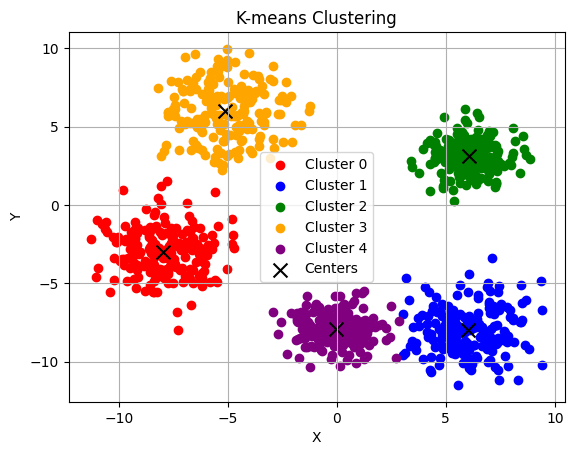

Final cluster centers:
Cluster 0: [-7.95591735 -2.99278485]
Cluster 1: [ 6.02368379 -7.99097107]
Cluster 2: [6.05723949 3.0998929 ]
Cluster 3: [-5.10910411  5.99308192]
Cluster 4: [-0.04028765 -7.92772681]


In [10]:
# Plot the results
colors = ['red', 'blue', 'green', 'orange', 'purple']
for i in range(k):
    cluster_points = data[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f'Cluster {i}')
    
# Plot the centers
plt.scatter(centers[:, 0], centers[:, 1], color='black', marker='x', s=100, label='Centers')
plt.title("K-means Clustering")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

print("Final cluster centers:")
for i, c in enumerate(centers):
    print(f"Cluster {i}: {c}")



question 4

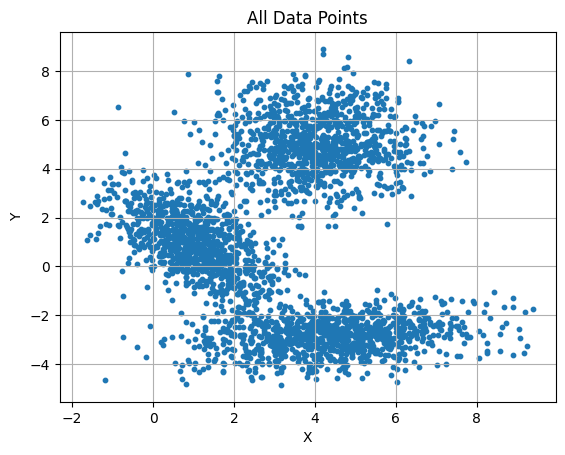

In [11]:
#a
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("clusterData2.csv")
data = df.to_numpy()

# Plot all data points
plt.scatter(data[:, 0], data[:, 1], s=10)
plt.title("All Data Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


In [15]:
# b
from scipy.stats import multivariate_normal

def em_algorithm(data, k, steps=100):
    n = data.shape[0]  # number of points
    d = data.shape[1]  # dimension (2D)

    # 1. Initialize means randomly from the data
    np.random.seed(0)
    means = data[np.random.choice(n, k, replace=False)]
    
    # 2. Initialize covariances (identity matrix)
    covs = [np.eye(d) for _ in range(k)]
    
    # 3. Initialize equal weights for each cluster
    weights = np.ones(k) / k

    for step in range(steps):
        # E-step: calculate responsibilities
        responsibilities = np.zeros((n, k))
        for i in range(k):
            rv = multivariate_normal(mean=means[i], cov=covs[i])
            responsibilities[:, i] = weights[i] * rv.pdf(data)
        
        # Normalize so each row sums to 1
        responsibilities = responsibilities / responsibilities.sum(axis=1, keepdims=True)

        # M-step: update means, covs, weights
        for i in range(k):
            resp = responsibilities[:, i]
            total_resp = resp.sum()

            # New mean
            means[i] = (data * resp[:, np.newaxis]).sum(axis=0) / total_resp

            # New covariance
            diff = data - means[i]
            covs[i] = np.dot((resp[:, np.newaxis] * diff).T, diff) / total_resp

            # New weight
            weights[i] = total_resp / n

    return means, covs, weights




In [16]:
# c
def plot_clusters_with_contours(data, means, covs, title):
    plt.scatter(data[:, 0], data[:, 1], s=10)

    x = np.linspace(data[:, 0].min(), data[:, 0].max(), 100)
    y = np.linspace(data[:, 1].min(), data[:, 1].max(), 100)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))

    for i in range(len(means)):
        rv = multivariate_normal(mean=means[i], cov=covs[i])
        plt.contour(X, Y, rv.pdf(pos), levels=5)

    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.show()


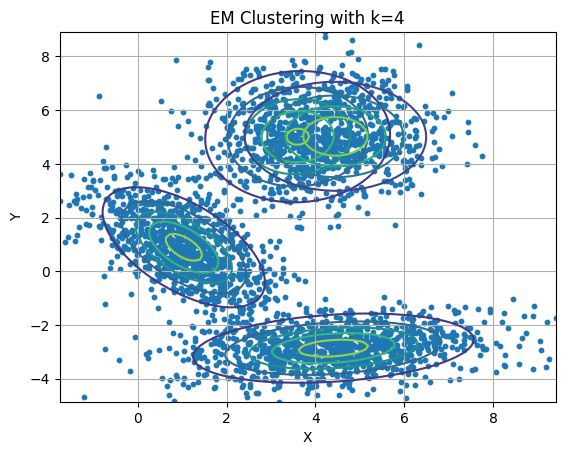

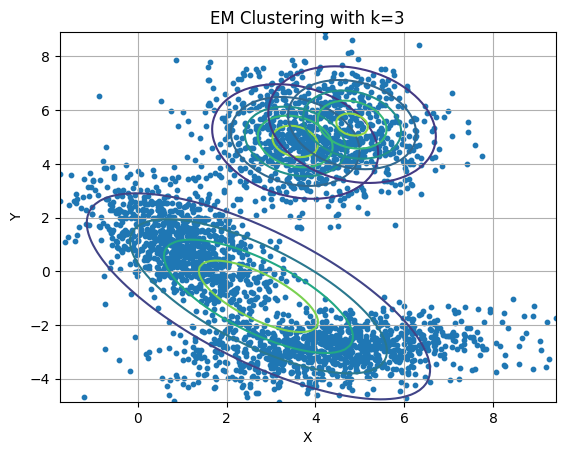

In [18]:
# Run EM for k=4
means4, covs4, weights4 = em_algorithm(data, k=4)
plot_clusters_with_contours(data, means4, covs4, title="EM Clustering with k=4")

# Run EM for k=3
means3, covs3, weights3 = em_algorithm(data, k=3)
plot_clusters_with_contours(data, means3, covs3, title="EM Clustering with k=3")


The EM clustering with k=4 is better because it captures the true structure of the data more accurately, with each Gaussian component fitting a distinct, compact cluster. In contrast, with k=3, some clearly separate groups are merged into a single elongated cluster, leading to poor representation and overlap. Therefore, k=4 provides a more precise and natural clustering of the underlying distributions.